In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

df = pd.read_csv(r"C:\\Contents\\Kaggle\\udacity-mlcharity-competition\\census.csv")

df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [3]:
set(df['income']), set(df['workclass']),set(df['education_level']), set(df['marital-status']), set(df['occupation'])

({'<=50K', '>50K'},
 {' Federal-gov',
  ' Local-gov',
  ' Private',
  ' Self-emp-inc',
  ' Self-emp-not-inc',
  ' State-gov',
  ' Without-pay'},
 {' 10th',
  ' 11th',
  ' 12th',
  ' 1st-4th',
  ' 5th-6th',
  ' 7th-8th',
  ' 9th',
  ' Assoc-acdm',
  ' Assoc-voc',
  ' Bachelors',
  ' Doctorate',
  ' HS-grad',
  ' Masters',
  ' Preschool',
  ' Prof-school',
  ' Some-college'},
 {' Divorced',
  ' Married-AF-spouse',
  ' Married-civ-spouse',
  ' Married-spouse-absent',
  ' Never-married',
  ' Separated',
  ' Widowed'},
 {' Adm-clerical',
  ' Armed-Forces',
  ' Craft-repair',
  ' Exec-managerial',
  ' Farming-fishing',
  ' Handlers-cleaners',
  ' Machine-op-inspct',
  ' Other-service',
  ' Priv-house-serv',
  ' Prof-specialty',
  ' Protective-serv',
  ' Sales',
  ' Tech-support',
  ' Transport-moving'})

In [4]:
set(df['relationship']), set(df['race']),set(df['sex']), set(df['native-country'])

({' Husband',
  ' Not-in-family',
  ' Other-relative',
  ' Own-child',
  ' Unmarried',
  ' Wife'},
 {' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other', ' White'},
 {' Female', ' Male'},
 {' Cambodia',
  ' Canada',
  ' China',
  ' Columbia',
  ' Cuba',
  ' Dominican-Republic',
  ' Ecuador',
  ' El-Salvador',
  ' England',
  ' France',
  ' Germany',
  ' Greece',
  ' Guatemala',
  ' Haiti',
  ' Holand-Netherlands',
  ' Honduras',
  ' Hong',
  ' Hungary',
  ' India',
  ' Iran',
  ' Ireland',
  ' Italy',
  ' Jamaica',
  ' Japan',
  ' Laos',
  ' Mexico',
  ' Nicaragua',
  ' Outlying-US(Guam-USVI-etc)',
  ' Peru',
  ' Philippines',
  ' Poland',
  ' Portugal',
  ' Puerto-Rico',
  ' Scotland',
  ' South',
  ' Taiwan',
  ' Thailand',
  ' Trinadad&Tobago',
  ' United-States',
  ' Vietnam',
  ' Yugoslavia'})

In [5]:
df.isnull().values.any()

False

In [10]:
catcols = ['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country']
df = pd.get_dummies(df, columns=catcols)
df.head()


,age,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13.0,2174.0,0.0,40.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13.0,0.0,0.0,13.0,<=50K,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13.0,0.0,0.0,40.0,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


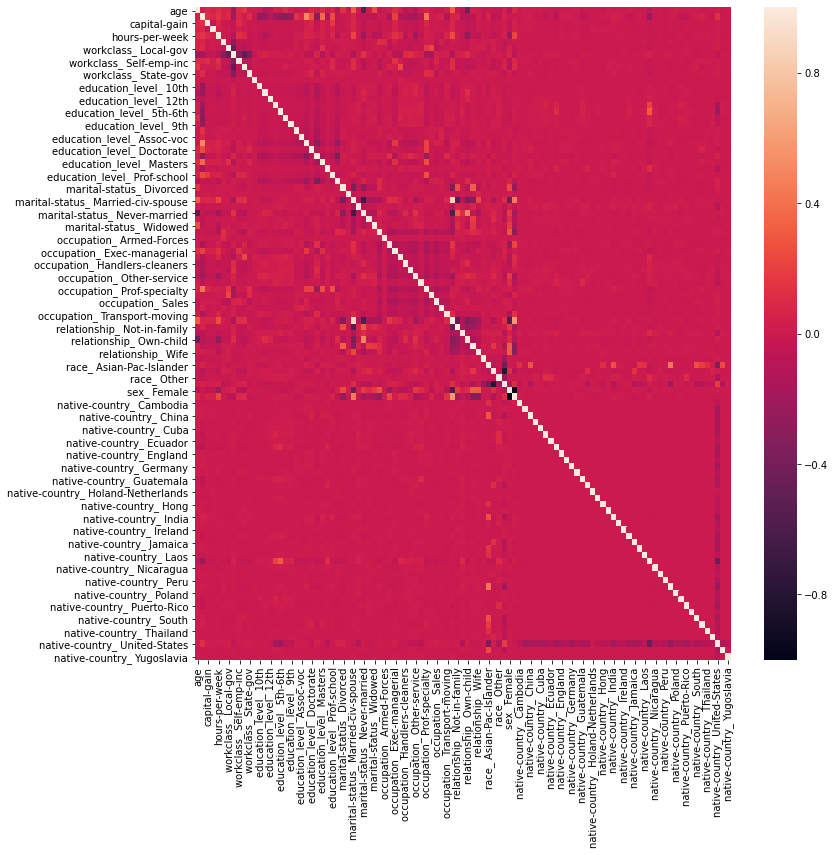

In [11]:
import seaborn as sb
fig = plt.figure(figsize=(12,12))
sb.heatmap(df.corr())
plt.show()

In [12]:
df.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
age,1.000000,0.037623,0.079683,0.059351,0.101992,0.054823,0.063694,-0.209763,0.106698,0.156174,...,0.005608,0.004745,0.011859,0.000236,-0.007639,-0.000654,0.002844,0.012082,-0.014403,0.003294
education-num,0.037623,1.000000,0.126907,0.081711,0.146206,0.054970,0.096524,-0.164869,0.081174,0.010568,...,-0.047135,-0.043631,0.001084,0.016338,0.046099,0.007379,-0.010147,0.132242,-0.010287,-0.006425
capital-gain,0.079683,0.126907,1.000000,-0.032102,0.083880,-0.004223,-0.012118,-0.047957,0.102329,0.028196,...,-0.004352,-0.006274,-0.003086,-0.001270,0.005585,-0.002868,-0.003134,0.010938,-0.002712,-0.000556
capital-loss,0.059351,0.081711,-0.032102,1.000000,0.054195,0.009106,0.009450,-0.032965,0.037218,0.015448,...,-0.008106,0.003320,-0.004602,0.002970,0.002227,-0.002339,0.004380,0.011766,0.000095,-0.004935
hours-per-week,0.101992,0.146206,0.083880,0.054195,1.000000,0.007387,-0.001639,-0.094559,0.123668,0.088012,...,0.004322,-0.010713,0.001422,0.015420,0.000233,0.010315,-0.004179,0.010228,-0.008040,-0.001354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_ Thailand,-0.000654,0.007379,-0.002868,-0.002339,0.010315,-0.004538,-0.003415,-0.002695,0.013733,0.001782,...,-0.000939,-0.001579,-0.000533,-0.001198,-0.000884,1.000000,-0.000608,-0.082111,-0.001086,-0.000571
native-country_ Trinadad&Tobago,0.002844,-0.010147,-0.003134,0.004380,-0.004179,0.001019,0.000795,-0.000313,0.005190,-0.003934,...,-0.000889,-0.001495,-0.000505,-0.001135,-0.000837,-0.000608,1.000000,-0.077745,-0.001028,-0.000541
native-country_ United-States,0.012082,0.132242,0.010938,0.011766,0.010228,0.016367,0.034298,-0.047663,0.005468,0.012425,...,-0.120103,-0.202033,-0.068182,-0.153359,-0.113112,-0.082111,-0.077745,1.000000,-0.138995,-0.073120
native-country_ Vietnam,-0.014403,-0.010287,-0.002712,0.000095,-0.008040,-0.001728,-0.003455,0.008056,-0.005575,0.000061,...,-0.001589,-0.002673,-0.000902,-0.002029,-0.001496,-0.001086,-0.001028,-0.138995,1.000000,-0.000967


In [13]:
income_map = {'<=50K': 0, '>50K' : 1}
df['income'] = df['income'].map(income_map)

In [14]:
len(df)

45222

In [15]:
from sklearn.model_selection import train_test_split
feature_col_names = [col for col in df.columns if col not in set(["income"])]
predicted_class_names = ["income"]

X = df[feature_col_names].values

Y = df[predicted_class_names].values

split_test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=split_test_size, random_state = 42)


In [16]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())


nb_predict_train = nb_model.predict(X_train)
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

print("Accuracy training : {0:.4f}".format(metrics.accuracy_score(y_train,nb_predict_train )))
print("Accuracy testing : {0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test )))
print('**********Confusion metrics**************')
print("{}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print('**********Classsification report**************')
print("{}".format(metrics.classification_report(y_test, nb_predict_test)))

Accuracy training : 0.8015
Accuracy testing : 0.8065
**********Confusion metrics**************
[[8215 1978]
 [ 647 2727]]
**********Classsification report**************
              precision    recall  f1-score   support

           0       0.93      0.81      0.86     10193
           1       0.58      0.81      0.68      3374

    accuracy                           0.81     13567
   macro avg       0.75      0.81      0.77     13567
weighted avg       0.84      0.81      0.82     13567



In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train.ravel())

rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

from sklearn import metrics

print("RF Accuracy training : {0:.4f}".format(metrics.accuracy_score(y_train,rf_predict_train )))
print("RF Accuracy testing : {0:.4f}".format(metrics.accuracy_score(y_test,rf_predict_test )))
print('********** RF Confusion metrics**************')
print("{}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print('**********RF Classsification report**************')
print("{}".format(metrics.classification_report(y_test, rf_predict_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF Accuracy training : 0.9632
RF Accuracy testing : 0.8414
********** RF Confusion metrics**************
[[9334  859]
 [1293 2081]]
**********RF Classsification report**************
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     10193
           1       0.71      0.62      0.66      3374

    accuracy                           0.84     13567
   macro avg       0.79      0.77      0.78     13567
weighted avg       0.84      0.84      0.84     13567



In [18]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train.ravel())
lr_predict_train = lr_model.predict(X_train)
lr_predict_test = lr_model.predict(X_test)

from sklearn import metrics

print("LR Accuracy training : {0:.4f}".format(metrics.accuracy_score(y_train,lr_predict_train )))
print("LR Accuracy testing : {0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test )))
print('********** LR Confusion metrics**************')
print("{}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print('**********LR Classsification report**************')
print("{}".format(metrics.classification_report(y_test, lr_predict_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR Accuracy training : 0.8467
LR Accuracy testing : 0.8497
********** LR Confusion metrics**************
[[9508  685]
 [1354 2020]]
**********LR Classsification report**************
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     10193
           1       0.75      0.60      0.66      3374

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.78     13567
weighted avg       0.84      0.85      0.84     13567



In [19]:
from xgboost.sklearn import XGBClassifier
xgb_regr = XGBClassifier(objective= 'binary:logistic', eval_metric="error")

xgb_regr.fit(X_train, y_train.ravel())
xgb_regr_predict_train = xgb_regr.predict(X_train)
xgb_regr_predict_test = xgb_regr.predict(X_test)

from sklearn import metrics

print("XGB Accuracy training : {0:.4f}".format(metrics.accuracy_score(y_train,xgb_regr_predict_train )))
print("XGB Accuracy testing : {0:.4f}".format(metrics.accuracy_score(y_test,xgb_regr_predict_test )))
print('********** XGB Confusion metrics**************')
print("{}".format(metrics.confusion_matrix(y_test, xgb_regr_predict_test)))
print('**********XGB Classsification report**************')
print("{}".format(metrics.classification_report(y_test, xgb_regr_predict_test)))

XGB Accuracy training : 0.8874
XGB Accuracy testing : 0.8715
********** XGB Confusion metrics**************
[[9579  614]
 [1129 2245]]
**********XGB Classsification report**************
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     10193
           1       0.79      0.67      0.72      3374

    accuracy                           0.87     13567
   macro avg       0.84      0.80      0.82     13567
weighted avg       0.87      0.87      0.87     13567

